<a href="https://colab.research.google.com/github/jrmirmi/ML-phenotype-pred/blob/main/logistic_regression_adnimerge_PET_snps_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

##import library
import gc
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub')
import numpy as np
import networkx
import csv
import pandas as pd
from tqdm import tqdm
import gzip
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from metrics import metrics
from labelling import label_ADNI
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.metrics import log_loss
import random
from sklearn.metrics import mean_squared_error
import pickle

# https://realpython.com/logistic-regression-python/

Mounted at /content/drive


In [2]:
# checkejem que s'obri correctament: 
with open('/content/drive/MyDrive/PROJECT/dataset_folds.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

df_fold_1 = dataset[0]
df_fold_2 = dataset[1]
df_fold_3 = dataset[2]
df_fold_4 = dataset[3]
df_fold_5 = dataset[4]

In [15]:
for i in range(len(dataset)):
  df_test = dataset[i-1]
  df_train_1=(dataset[i])
  


0
1
2
3
4


In [3]:
# Crea las listas vacías para las métricas
cm_list = []
accuracy_list = []
balanced_accuracy_list = []
precision_list = []
recall_list = []
specificity_list = []
NPV_list = []
f1_list = []
roc_auc_list = []
loss_list = []

for i in range(len(dataset)):
  df_train = pd.concat([dataset[j] for j in range(len(dataset)) if j != i], axis=0)
  df_test = dataset[i]

  X_train = df_train.drop(columns=['y'])
  y_train = df_train['y']

  X_test = df_test.drop(columns=['y'])
  y_test = df_test['y']
  y_test = y_test.astype(float).round(1)

  model = LogisticRegression(max_iter=1000)

  # TRain the model using our data sets
  model.fit(X_train, y_train)

    # Make the prediction
  y_pred = model.predict(X_test)
  y_pred = y_pred.astype(float).round(1)
  y_proba = model.predict_proba(X_test)[:,1]

    # compute the metrics
  classes=['0.0', '1.0']
  cm, accuracy, balanced_accuracy, precision, recall, specificity, NPV, f1, roc_auc, thresholds = metrics(y_test, y_pred, y_proba, classes)

    # compute the loss function
  loss = mean_squared_error(y_test.dropna(), y_pred[y_test.notna()])


    # store the data in the lists
  cm_list.append(cm)
  accuracy_list.append(accuracy)
  balanced_accuracy_list.append(balanced_accuracy)
  precision_list.append(precision)
  recall_list.append(recall)
  specificity_list.append(specificity)
  NPV_list.append(NPV)
  f1_list.append(f1)
  roc_auc_list.append(roc_auc)
  loss_list.append(loss) 

ValueError: ignored

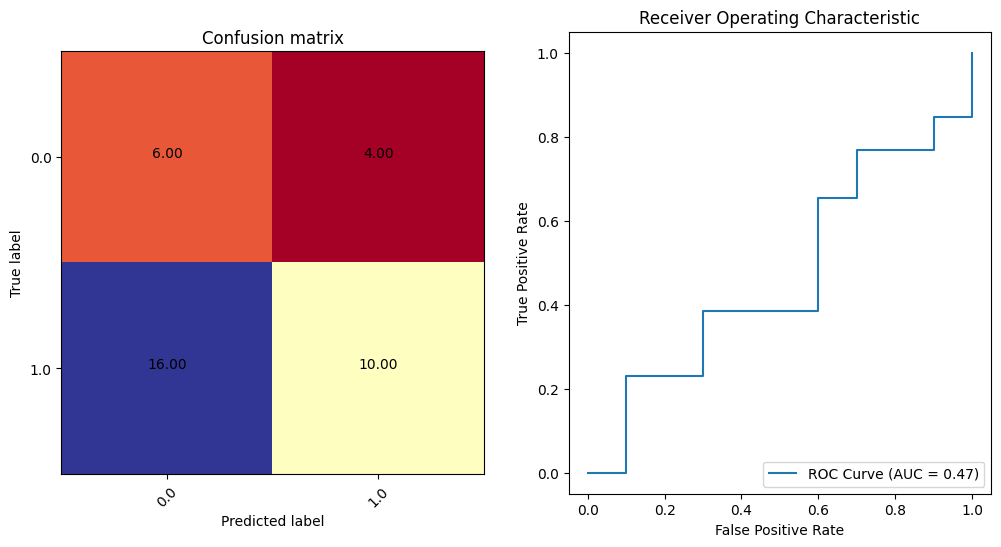

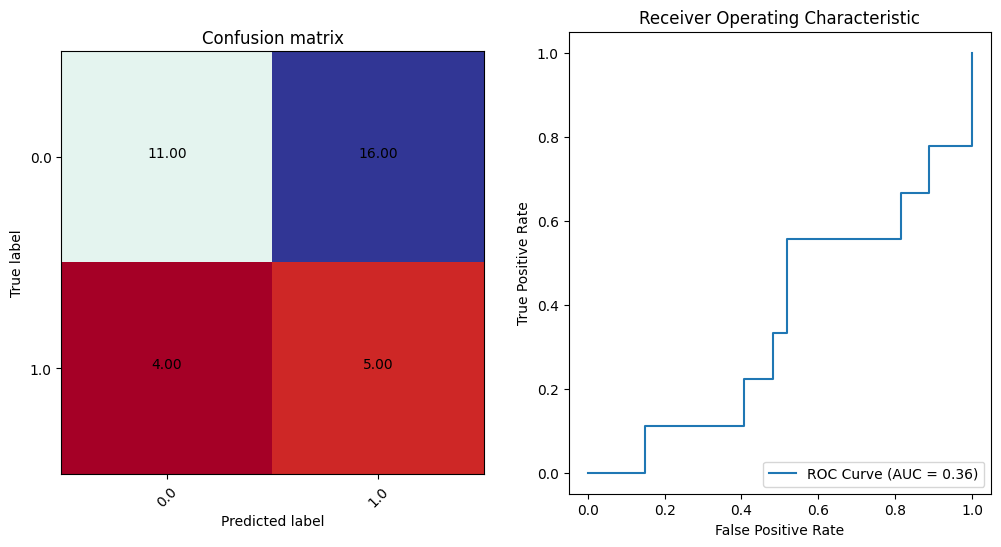

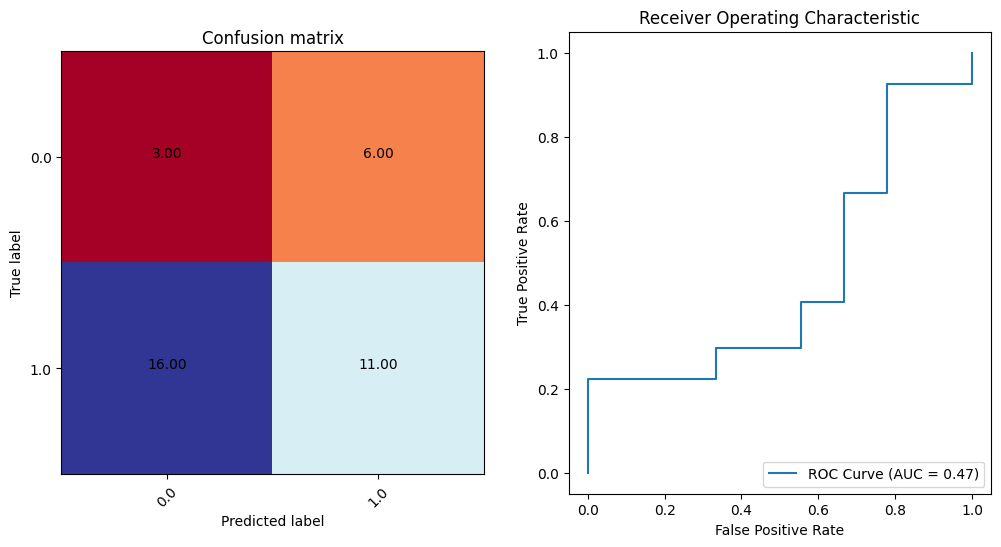

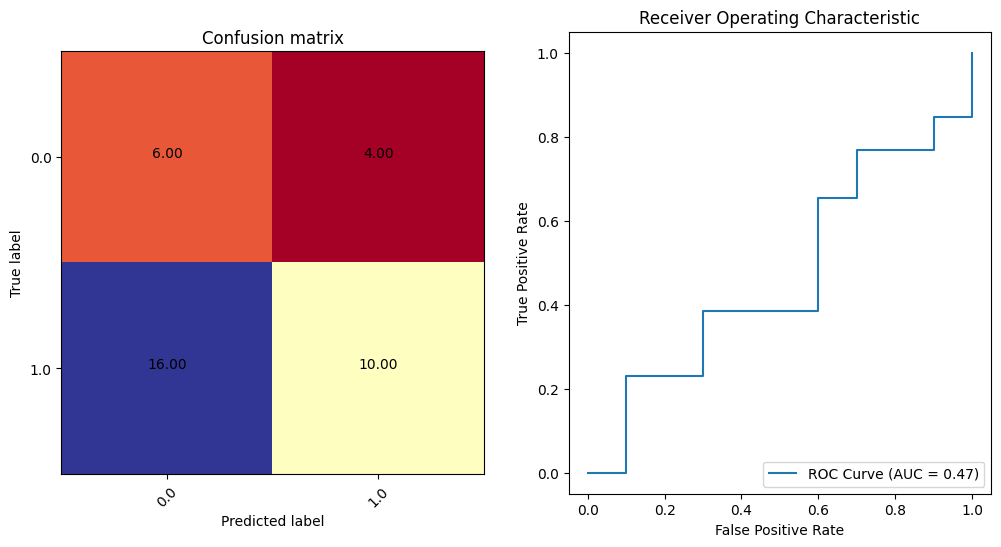

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


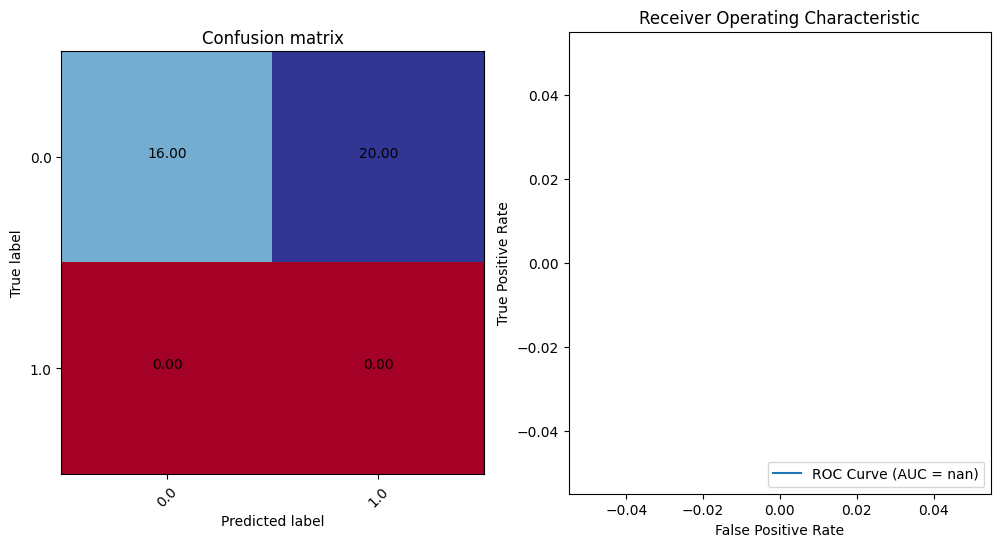

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


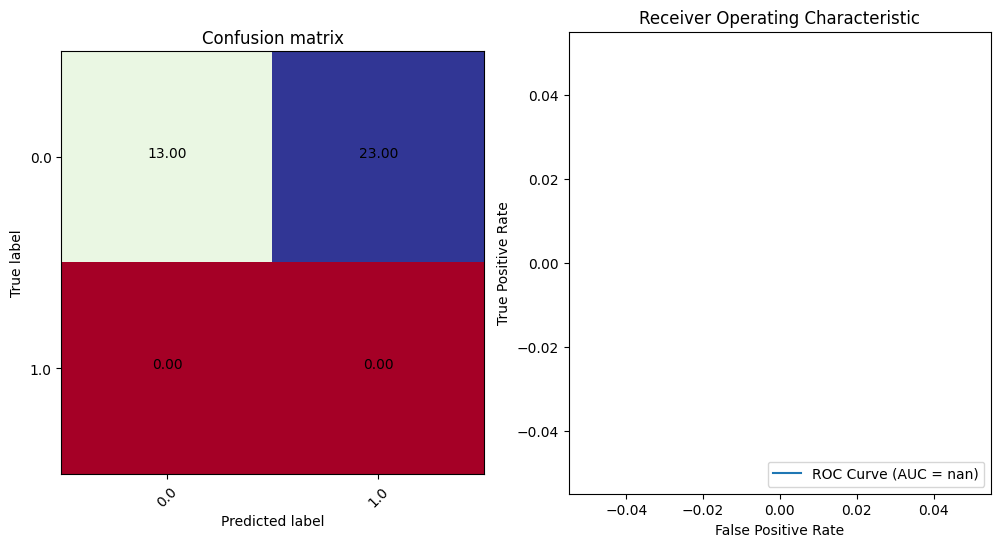

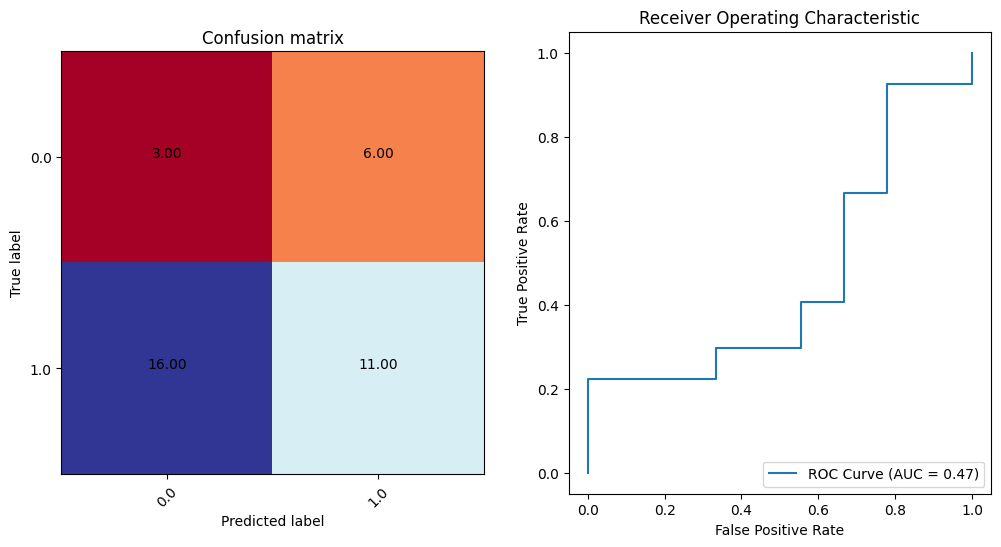

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


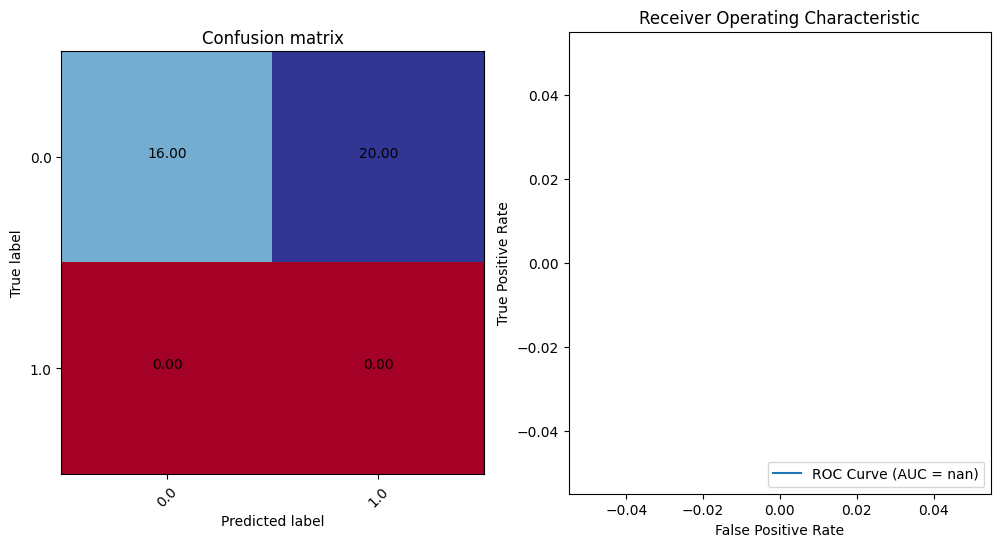

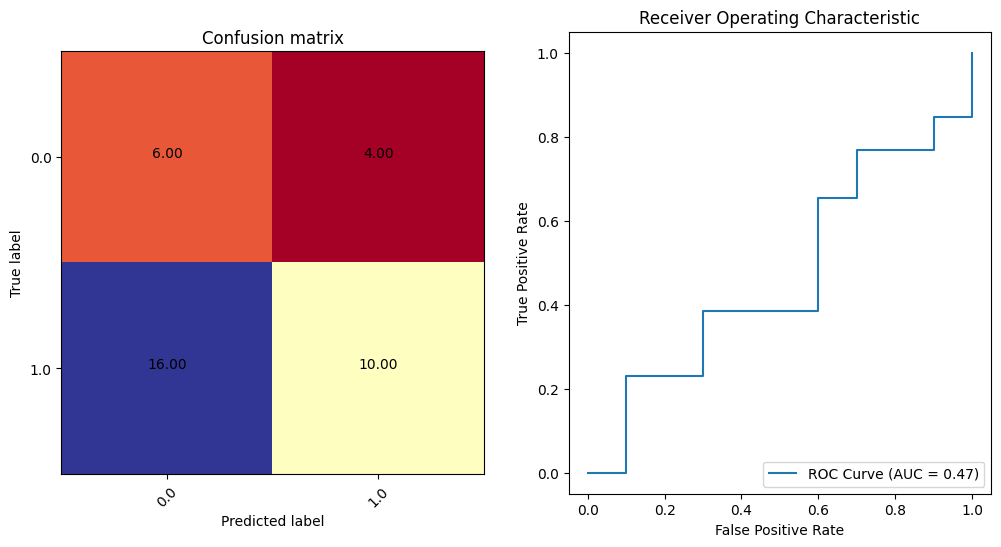

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


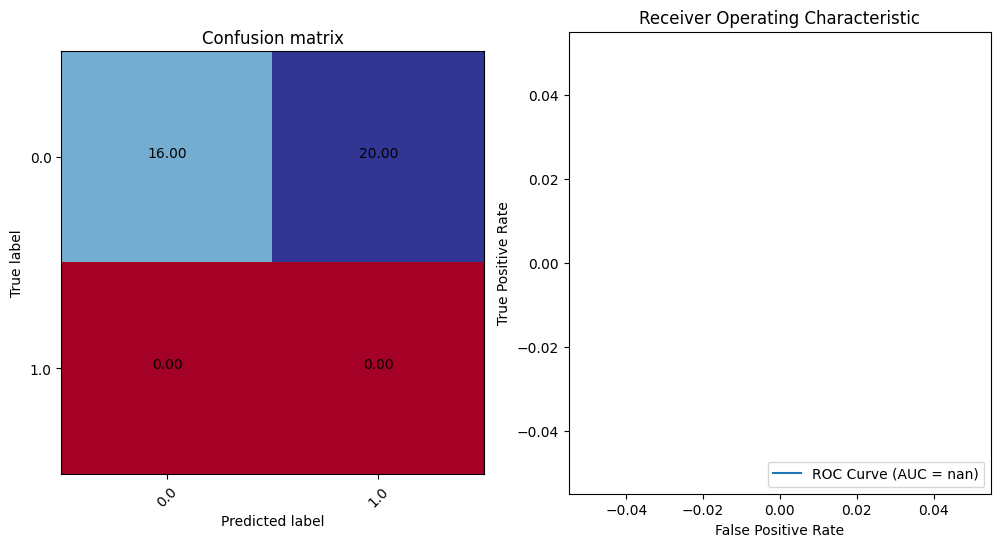

In [ ]:
# Crea las listas vacías para las métricas
cm_list = []
accuracy_list = []
balanced_accuracy_list = []
precision_list = []
recall_list = []
specificity_list = []
NPV_list = []
f1_list = []
roc_auc_list = []
loss_list = []

# Bucle for para iterar 10 veces
for i in range(10):
    # Divide aleatoriamente los datos en conjuntos de entrenamiento y validación
    random.shuffle(folds)
    training_set = pd.concat(folds[:9])
    validation_set = folds[9]
    
    # Separa las características y la variable objetivo
    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']

    X_test = validation_set.drop(columns=['y'])
    y_test = validation_set['y']
    y_test = y_test.astype(float).round(1)

    model = LogisticRegression(max_iter=1000)

    # TRain the model using our data sets
    model.fit(X_train, y_train)

    # Make the prediction
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(float).round(1)
    y_proba = model.predict_proba(X_test)[:,1]

    # compute the metrics
    classes=['0.0', '1.0']
    cm, accuracy, balanced_accuracy, precision, recall, specificity, NPV, f1, roc_auc, thresholds = metrics(y_test, y_pred, y_proba, classes)

    # compute the loss function
    loss = mean_squared_error(y_test.dropna(), y_pred[y_test.notna()])


    # store the data in the lists
    cm_list.append(cm)
    accuracy_list.append(accuracy)
    balanced_accuracy_list.append(balanced_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    specificity_list.append(specificity)
    NPV_list.append(NPV)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    loss_list.append(loss)

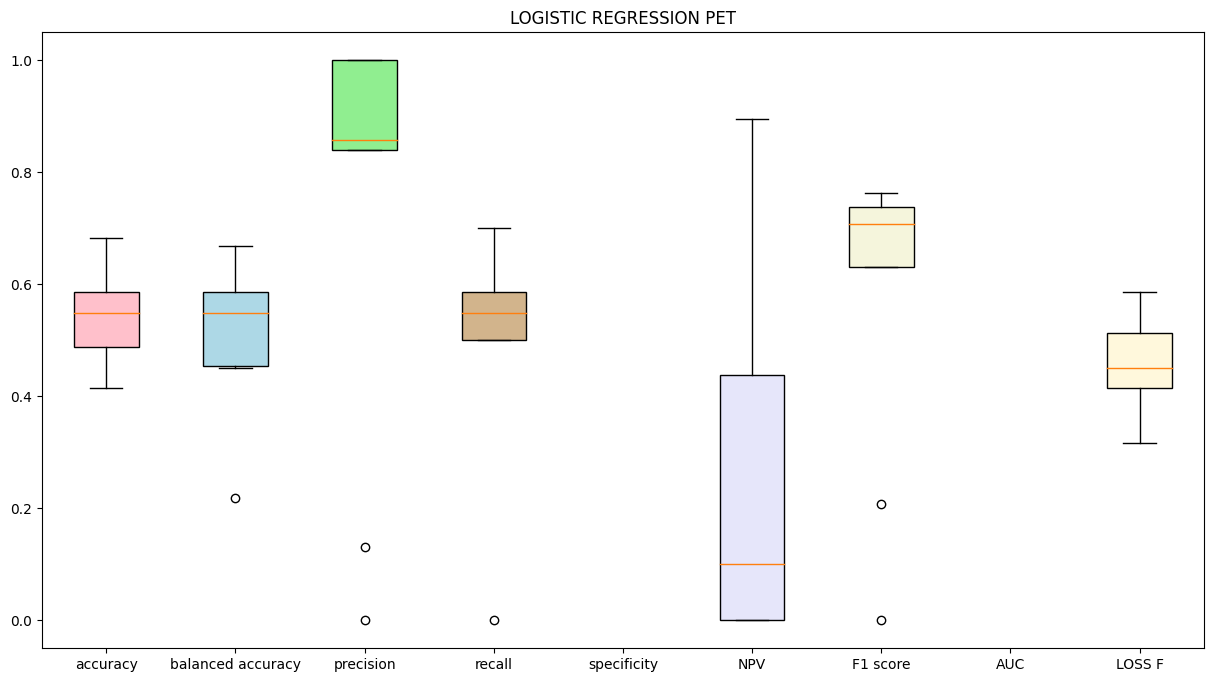

In [ ]:
# definisci una lista con le tue 8 liste di dati
metric = [accuracy_list, balanced_accuracy_list, precision_list, recall_list, specificity_list, NPV_list, f1_list, roc_auc_list, loss_list]

# definisci i nomi dei boxplot
names = ['accuracy', 'balanced accuracy', 'precision', 'recall', 'specificity', 'NPV', 'F1 score', 'AUC', 'LOSS F']

# crea la figura e gli assi
fig, ax = plt.subplots(figsize=(15, 8))

# disegna i boxplot
bp = ax.boxplot(metric, labels=names, patch_artist=True)

# imposta i colori dei boxplot
colors = ['pink', 'lightblue', 'lightgreen', 'tan', 'lightgrey', 'lavender', 'beige', 'plum', 'cornsilk']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# imposta il titolo e le etichette degli assi
ax.set_title('LOGISTIC REGRESSION PET')

# mostra la figura
plt.show()

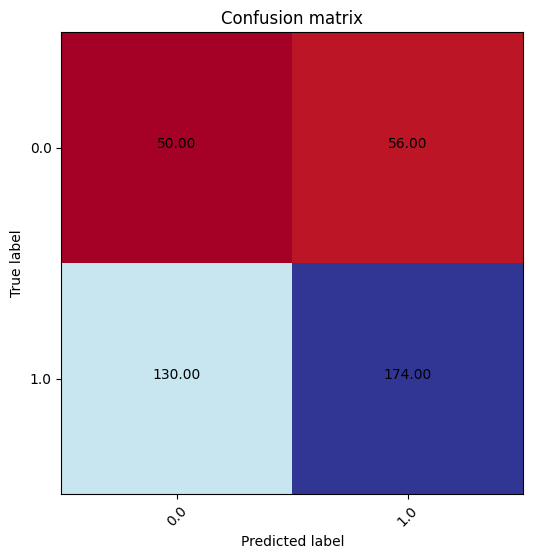

In [ ]:
cm = np.zeros((2, 2))  # Inizializzazione della matrice vuota
for i in cm_list:
    cm += i

# Creazione del grafico
fig, ax1 = plt.subplots(figsize=(12, 6))
im = ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.RdYlBu)
ax1.set_title('Confusion matrix')
ax1.set_xticks(np.arange(len(classes)))
ax1.set_yticks(np.arange(len(classes)))
ax1.set_xticklabels(classes, rotation=45)
ax1.set_yticklabels(classes)
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax1.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='black' if cm[i, j] > thresh else 'black')

plt.show()  # Mostra il grafico

In [ ]:
print(str(round(np.mean(roc_auc_list),4)) + ' +- ' + str(round(np.std(roc_auc_list),4)))

nan +- nan
